In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

from pycaret.regression import *

In [41]:
df_train = pd.read_csv("data/train_clean.csv")
df_test = pd.read_csv("data/test_clean.csv")

In [42]:
df_train[["cut", "color", "clarity"]] = df_train[["cut", "color", "clarity"]].apply(lambda x:x.astype("float64"))

In [43]:
df_train.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [44]:
exp_clf101 = setup(data = df_train, target = "price", session_id=123)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(40455, 10)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(28318, 9)"


In [45]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0665,0.0084,0.0916,0.9918,0.0105,0.0086,0.2950
et,Extra Trees Regressor,0.0676,0.0090,0.0947,0.9912,0.0109,0.0088,2.9910
rf,Random Forest Regressor,0.0672,0.0092,0.0955,0.9911,0.0109,0.0087,4.1170
gbr,Gradient Boosting Regressor,0.0830,0.0118,0.1085,0.9885,0.0127,0.0110,1.3620
dt,Decision Tree Regressor,0.0901,0.0173,0.1316,0.9831,0.0150,0.0116,0.0750
knn,K Neighbors Regressor,0.1350,0.0329,0.1814,0.9679,0.0212,0.0178,0.1210
ada,AdaBoost Regressor,0.1571,0.0391,0.1977,0.9619,0.0232,0.0207,0.9520
huber,Huber Regressor,0.1254,0.0724,0.2389,0.9299,0.0284,0.0163,0.3800
par,Passive Aggressive Regressor,0.1859,0.0885,0.2849,0.9142,0.0318,0.0240,0.0440
ridge,Ridge Regression,0.1292,0.0936,0.2552,0.9097,0.0295,0.0167,0.0130


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [46]:
lgbm_reg = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0676,0.0088,0.0939,0.9915,0.0107,0.0087
1,0.0668,0.0083,0.0911,0.9918,0.0104,0.0086
2,0.0661,0.0080,0.0893,0.9922,0.0101,0.0085
3,0.0660,0.0079,0.0889,0.9924,0.0101,0.0085
4,0.0648,0.0081,0.0898,0.9923,0.0103,0.0084
5,0.0663,0.0081,0.0900,0.9921,0.0103,0.0086
6,0.0665,0.0084,0.0916,0.9919,0.0104,0.0086
7,0.0658,0.0077,0.0877,0.9927,0.0101,0.0086
8,0.0679,0.0102,0.1010,0.9897,0.0114,0.0088
9,0.0668,0.0086,0.0925,0.9916,0.0107,0.0087


In [47]:
tuned_lgbm = tune_model(lgbm_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0792,0.0113,0.1061,0.9891,0.0123,0.0104
1,0.0796,0.0110,0.1050,0.9891,0.0121,0.0104
2,0.0787,0.0108,0.1040,0.9895,0.0120,0.0103
3,0.0773,0.0102,0.1008,0.9903,0.0116,0.0101
4,0.0779,0.0108,0.1037,0.9897,0.0120,0.0102
5,0.0772,0.0104,0.1021,0.9898,0.0118,0.0101
6,0.0792,0.0107,0.1036,0.9896,0.0120,0.0104
7,0.0768,0.0099,0.0997,0.9905,0.0116,0.0101
8,0.0789,0.0117,0.1084,0.9881,0.0125,0.0104
9,0.0783,0.0109,0.1045,0.9892,0.0122,0.0103


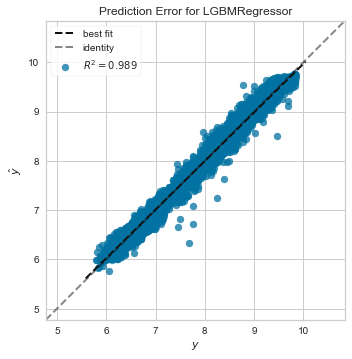

In [48]:
plot_model(tuned_lgbm, plot = "error")

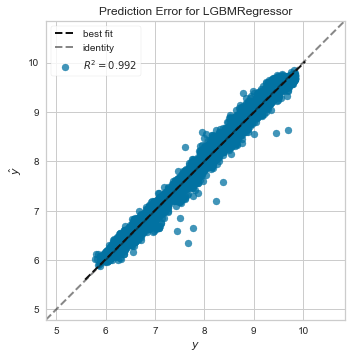

In [49]:
plot_model(lgbm_reg, plot = "error")

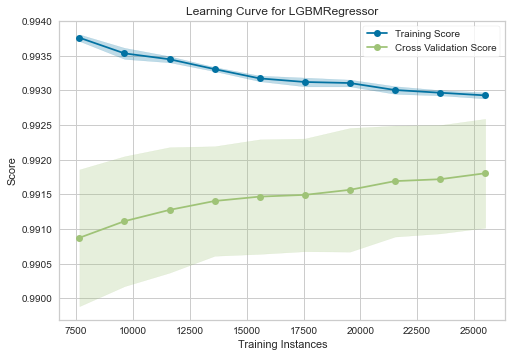

In [50]:
plot_model(lgbm_reg, plot = "learning")

In [51]:
predict_model(lgbm_reg);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0664,0.0086,0.0929,0.9916,0.0106,0.0086


In [52]:
final_lgbm = finalize_model(lgbm_reg)

In [53]:
final_lgbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [54]:
predict_model(final_lgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0637,0.0077,0.0879,0.9925,0.0100,0.0082


In [55]:
final_pred = final_lgbm.predict(df_test)

In [56]:
test = pd.DataFrame(df_test.index, columns=["id"])
test["price"] = final_pred
#display in a dataframe

In [57]:
test

,id,price
0,0,7.053953
1,1,8.383505
2,2,7.629230
3,3,8.546060
4,4,9.557041
...,...,...
13480,13480,8.462733
13481,13481,6.450129
13482,13482,6.616571
13483,13483,6.729322


In [58]:
test.to_csv("output/Pycaret.csv", index = False, header = True)